In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import re
import os
import matplotlib.pyplot as plt

tf.__version__
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/train.csv")
df_val = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/val.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/test.csv")


In [ ]:
df_train[df_train.duplicated()]


,text,augmented_text
6906,a league live streaming updates,a elgaue ivle streaming updates
9455,abc business news and market analysis,abc buisnses news and maretk analysis
9476,abc business news and market analysis,abc business ensw and market anyalsis
9487,abc business news and market analysis,abc ubisness news and market analysis
9498,abc business news and market analysis,abc busienss wnes and market analysis
...,...,...
742784,wednesday finance with alan kohler,wednesday finnaec with lana kohler
742790,wednesday finance with alan kohler,wednesday finance with lana kohler
742816,wednesday finance with alan kohler,wednesday finance with lana kohler
742873,wednesday markets with fiona clark,wednesday markets iwht fiona lcakr


In [ ]:
df_val[df_val.duplicated()]


,text,augmented_text
42958,abc business news and market analysis,abc ubsiness news and market analysis
150906,abc business news and market analysis,abc usbiness news and mraekt analysis


In [ ]:
df_test[df_test.duplicated()]


,text,augmented_text
52797,abc business news and market analysis,abc business wnes and market aanlyiss
98255,abc business news and market analysis,abc ubsiness news and market analysis


In [ ]:
# def clean_data(text):
#     text = text.lower()
#     text = re.sub(r"[-=+*\"#@!$%^&()`<>/[\]]","",text)
#     text = re.sub(r"i'm","i am",text)
#     text = re.sub(r"he's","he is",text)
#     text = re.sub(r"she's","she is",text)
#     text = re.sub(r"it's","it is",text)
#     text = re.sub(r"they're","they are",text)
#     text = re.sub(r"there're","there are",text)
#     text = re.sub(r"there's","there is",text)
#     text = re.sub(r"how're","how are",text)
#     text = re.sub(r"what're","what are",text)
#     text = re.sub(r"where're","where ",text)
#     text = re.sub(r"who're","who are",text)
#     text = re.sub(r"that're","that are",text)
#     text = re.sub(r"when're","when are",text)
#     text = re.sub(r"how's","how is",text)
#     text = re.sub(r"what's","what is",text)
#     text = re.sub(r"where's","where is",text)
#     text = re.sub(r"who's","who is",text)
#     text = re.sub(r"that's","that is",text)
#     text = re.sub(r"when's","when is",text)
#     text = re.sub(r"won't","would not",text)
#     text = re.sub(r"nt't","can not",text)
#     text = re.sub(r"\'bout'","about",text)
#     text = re.sub(r"\'till'","untill",text)
#     text = re.sub(r"\'ll","will",text)
#     text = re.sub(r"\'ve","have",text)
#     text = re.sub(r"\'re","are",text)
#     text = re.sub(r"\'d","would",text)
#     text = re.sub(r"\."," ",text)
#     text = re.sub(r"\,"," ",text)
#     text = re.sub(r"\!"," ",text)
#     text = re.sub(r"\?"," ",text)
#     text = re.sub(r"\;"," ",text)
#     text = re.sub(r"\:"," ",text)
#     return text

    
# df_train['text'] = df_train['text'].apply(clean_data)
# df_train['augmented_text'] = df_train['augmented_text'].apply(clean_data)
# df_val['text'] = df_val['text'].apply(clean_data)
# df_val['augmented_text'] = df_val['augmented_text'].apply(clean_data)
# df_test['text'] = df_test['text'].apply(clean_data)
# df_test['augmented_text'] = df_test['augmented_text'].apply(clean_data)
# data = pd.concat([df_train,df_val,df_test])


In [ ]:
# data.to_csv('/content/drive/MyDrive/Colab_Notebooks/data.csv',index=False,)

In [ ]:
#data.csv is being pre-process to save time for training
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data.csv')

In [ ]:
print(data.isnull().sum())
data = data.drop_duplicates(subset=['augmented_text'])
# data = (data[data["augmented_text"] != "name"])
print(data.duplicated().sum())

text              0
augmented_text    0
dtype: int64
0


In [ ]:
df = data

In [ ]:
df.describe()

,text,augmented_text
count,1024690,1024690
unique,1017097,1024690
top,abc business news and market analysis,1 billion darling hsarfbour redeevelopment p3...
freq,516,1


In [ ]:
# df = df[:82000]
train_df = df['augmented_text']
test_df = df['text']
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_df, test_df, test_size=0.27, random_state=0)
val_x, test_x,val_y, test_y = train_test_split(test_x, test_y, test_size = 0.5, random_state=24)


In [ ]:
train_x

401592                man jailed pfer hqkls creek sex atask
131453    hcian prepares large cslae rollout of isnopahr...
780888    nhnter lilt comes 10th at hot air bapoon world...
200594          rdess tsandrads questioned in sa parliament
201857           drivreless cars test edtectoin software on
                                ...                        
963542    trump grand military paqdes and not so grsnr q...
118001                     cxge sud9ends operations in iraq
435903                    orme money lost on benidog pokies
305771                     hlc ey backs coal rkjalty scheme
985926      memornaudm sgnied to improve interaction within
Name: augmented_text, Length: 748023, dtype: object

In [ ]:
train_y

401592               man jailed over halls creek sex attack
131453    china prepares large scale rollout of sinophar...
780888    hunter pilot comes 10th at hot air balloon wor...
200594          dress standards questioned in sa parliament
201857           driverless cars test detection software on
                                ...                        
963542    trump grand military parades and not so grand ...
118001                     care suspends operations in iraq
435903                    more money lost on bendigo pokies
305771                     hickey backs coal royalty scheme
985926      memorandum signed to improve interaction within
Name: text, Length: 748023, dtype: object

In [ ]:
max_length = 74

In [ ]:

g_text_tokenizer = Tokenizer(char_level=True)
g_text_tokenizer.fit_on_texts(train_x)
g_text_word_index = g_text_tokenizer.word_index
train_sequences = g_text_tokenizer.texts_to_sequences(train_x)
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding='post')


text_tokenizer = Tokenizer(char_level=True)
text_tokenizer.fit_on_texts(train_y)
text_word_index = text_tokenizer.word_index
test_sequences = text_tokenizer.texts_to_sequences(train_y)
test_padded = pad_sequences(test_sequences,maxlen = max_length, padding='post')





In [ ]:
val_train_sequences = g_text_tokenizer.texts_to_sequences(val_x)
val_train_padded = pad_sequences(val_train_sequences, maxlen = max_length, padding='post')

val_test_sequences = text_tokenizer.texts_to_sequences(val_y)
val_test_padded = pad_sequences(val_test_sequences, maxlen = max_length, padding='post')

In [ ]:
g_vocab_size = len(g_text_word_index)+1
vocab_size = len(text_word_index)+1
print(g_vocab_size, vocab_size)

40 39


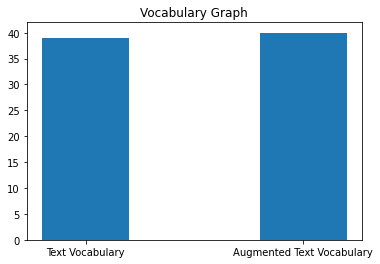

In [ ]:
voc = ["Text Vocabulary", "Augmented Text Vocabulary"]
voc_count = [vocab_size, g_vocab_size]

plt.bar(voc, voc_count, width = 0.4)
plt.title("Vocabulary Graph")
plt.show()

In [ ]:
temp_test_padded = test_padded.reshape((test_padded.shape[0], test_padded.shape[1],1))


In [ ]:
epoch = 60

In [ ]:
#combine the first two methods
from keras.regularizers import l2
model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=g_vocab_size, output_dim=296, input_length=max_length, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(148)),
    tf.keras.layers.RepeatVector(max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(148, return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(148, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(74,  return_sequences=True)),
    tf.keras.layers.Dense(vocab_size,activation='softmax')
])
# learning_rate = 0.003
# optimizer = tf.keras.optimizers.Adam(learning_rate)
learning_rate = 0.0005
optimizer = tf.keras.optimizers.RMSprop(learning_rate)
optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
model_4.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])
model_4.summary(expand_nested=True,
    show_trainable=True)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 embedding (Embedding)       (None, 74, 296)           11840     Y          
                                                                            
 bidirectional (Bidirectiona  (None, 296)              526880    Y          
 l)                                                                         
                                                                            
 repeat_vector (RepeatVector  (None, 74, 296)          0         Y          
 )                                                                          
                                                                            
 bidirectional_1 (Bidirectio  (None, 74, 296)          526880    Y          
 nal)                                                                       
                                                        

Epoch 1/60
2922/2922 [==============================] - 241s 78ms/step - loss: 1.6645 - accuracy: 0.4994 - val_loss: 1.4147 - val_accuracy: 0.5347
Epoch 2/60
2922/2922 [==============================] - 225s 77ms/step - loss: 1.2615 - accuracy: 0.5767 - val_loss: 1.1305 - val_accuracy: 0.6152
Epoch 3/60
2922/2922 [==============================] - 225s 77ms/step - loss: 1.0657 - accuracy: 0.6379 - val_loss: 1.0285 - val_accuracy: 0.6452
Epoch 4/60
2922/2922 [==============================] - 225s 77ms/step - loss: 0.9525 - accuracy: 0.6770 - val_loss: 0.9241 - val_accuracy: 0.6853
Epoch 5/60
2922/2922 [==============================] - 225s 77ms/step - loss: 0.8746 - accuracy: 0.7066 - val_loss: 0.9167 - val_accuracy: 0.6776
Epoch 6/60
2922/2922 [==============================] - 225s 77ms/step - loss: 0.8177 - accuracy: 0.7296 - val_loss: 0.8069 - val_accuracy: 0.7297
Epoch 7/60
2922/2922 [==============================] - 223s 76ms/step - loss: 0.7736 - accuracy: 0.7477 - val_loss: 0

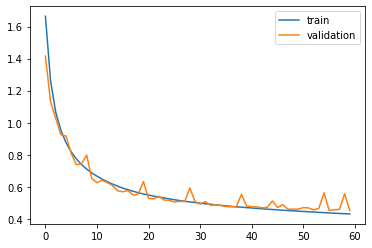

In [23]:
his_4 = model_4.fit(train_padded, test_padded, batch_size=256, epochs=epoch, validation_data = (val_train_padded, val_test_padded))

plt.plot(his_4.history['loss'])
plt.plot(his_4.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [24]:
# epoch = 10
# his = model.fit(train_padded, test_padded, batch_size=512, epochs=epoch, validation_data = (val_train_padded, val_test_padded))

In [25]:
# model.save('/content/drive/MyDrive/Colab_Notebooks/accuracy_84_3lstm_rnn_8inputlength')

In [26]:
test_sample = test_x.iloc[:10]
test_sample = g_text_tokenizer.texts_to_sequences(test_sample)
test_sample = pad_sequences(test_sample, maxlen=max_length, padding='post')


In [27]:
test_x.iloc[:10]

967424                    casino expansion faesc oppositoni
706404       un respogfs to the prime ministers hhmqn lghts
230638    fxrmdrs voice water eor5ies amid vickery mine ...
218368          ethiopian pm satns of ps4 elwctuon violence
877144                  hueigll advances to butetfrly semis
931880           roger fexn sfo e our memories qags victims
58166     zustrallans stuck on board coronqvifus crjose ...
892226     us ivnestiagting hwehter zarqawi manog iraq dead
793036     5ouhher times p5edidted for qld tojeism industry
64421     albloonist ' s atlantic ' bato ' flight ends i...
Name: augmented_text, dtype: object

In [28]:
test_y.iloc[:10]

967424                    casino expansion faces opposition
706404      un responds to the prime ministers human rights
230638    farmers voice water worries amid vickery mine ...
218368         ethiopian pm warns of post election violence
877144                  huegill advances to butterfly semis
931880           roger dean stole our memories says victims
58166     australians stuck on board coronavirus cruise ...
892226     us investigating whether zarqawi among iraq dead
793036     tougher times predicted for qld tourism industry
64421     balloonist's atlantic 'boat' flight ends in fa...
Name: text, dtype: object

In [29]:
pre = model_4.predict(test_sample)
def deTokenize(logits):
    index_to_words = {id: word for word, id in text_tokenizer.word_index.items()}
    index_to_words[0] = ''
    pre_index = np.argmax(logits, 1)
    return ''.join(index_to_words[prediction] for prediction in pre_index)
predict = []
for i in range(10):
  predict.append(deTokenize(pre[i]))

In [30]:
eva = pd.DataFrame({'input': test_x.iloc[:10], 'output': test_y.iloc[:10], 'predict':predict})
eva


,input,output,predict
967424,casino expansion faesc oppositoni,casino expansion faces opposition,casion expansion faces opposition
706404,un respogfs to the prime ministers hhmqn lghts,un responds to the prime ministers human rights,un resporgs to the prime ministers hhmaa light
230638,fxrmdrs voice water eor5ies amid vickery mine ...,farmers voice water worries amid vickery mine ...,farmers voice water retores amid vickery mine ...
218368,ethiopian pm satns of ps4 elwctuon violence,ethiopian pm warns of post election violence,ethiopian pm sasts of ppe eecctoon iillence
877144,hueigll advances to butetfrly semis,huegill advances to butterfly semis,huiglll advanc s to butterrly ssmis
931880,roger fexn sfo e our memories qags victims,roger dean stole our memories says victims,roger fean ssoll our mmmoorie aas vicctiss
58166,zustrallans stuck on board coronqvifus crjose ...,australians stuck on board coronavirus cruise ...,australians stuck on board coronavirus crosse ...
892226,us ivnestiagting hwehter zarqawi manog iraq dead,us investigating whether zarqawi among iraq dead,us investigating heether aarwaia manon iraq dead
793036,5ouhher times p5edidted for qld tojeism industry,tougher times predicted for qld tourism industry,touther times predidted for qld toomiss industry
64421,albloonist ' s atlantic ' bato ' flight ends i...,balloonist's atlantic 'boat' flight ends in fa...,aaloooonis's alaanncss bath fflight eeds in af...


In [31]:
print("Iutput:    ",test_x.iloc[0])
print("Actual:    ",test_y.iloc[0])
print("Predicted: ",deTokenize(pre[0]))

Iutput:     casino expansion faesc oppositoni
Actual:     casino expansion faces opposition
Predicted:  casion expansion faces opposition
